In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [17]:
# df_clss = pd.read_csv('data_banknote_authentication.csv')
df = pd.read_csv('banknote_data.csv')

num_rows = df.shape[0]
half_rows = num_rows // 2
df1 = df.iloc[:half_rows, :]
df2 = df.iloc[half_rows:, :]

df1


,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552
...,...,...
681,2.24290,-4.1427
682,3.73210,-3.8840
683,4.33650,-3.5840
684,-2.07590,10.8223


In [18]:
df1.isnull().sum()

V1    0
V2    0
dtype: int64

In [19]:
df1.describe()

,V1,V2
count,686.000000,686.000000
mean,2.260105,4.276034
std,2.020531,5.151181
min,-4.285900,-6.932100
25%,0.895760,0.465062
50%,2.532950,5.683300
75%,3.865600,8.744775
max,6.824800,12.951600


In [20]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      686 non-null    float64
 1   V2      686 non-null    float64
dtypes: float64(2)
memory usage: 10.8 KB


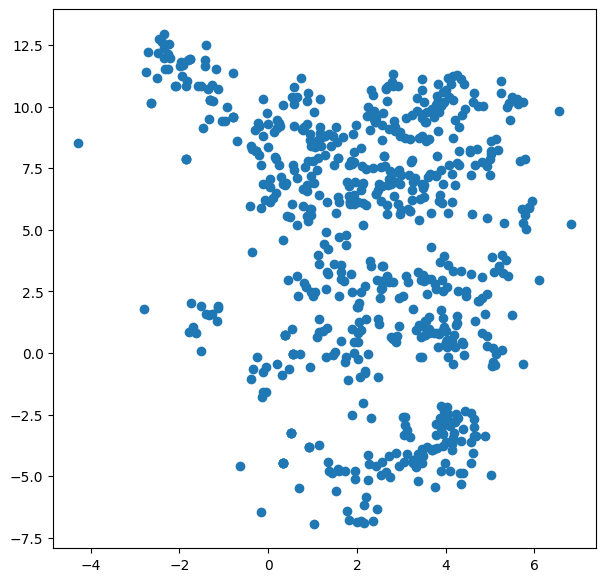

In [21]:
plt.figure(figsize = [7, 7])
plt.scatter(df1.V1, df1.V2)

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chiss\AppData\Local\Temp\ipykernel_3176\1796640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KMeans'] = km_res.labels_
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is dep

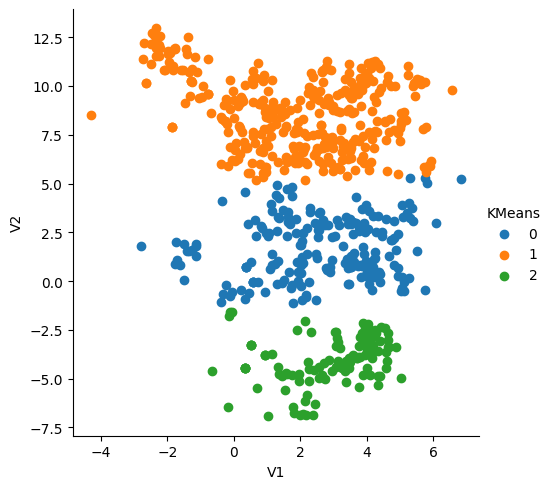

In [22]:
data = np.column_stack((df1.V1, df1.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 3).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df1['KMeans'] = km_res.labels_

#plot out the result
g = sns.FacetGrid(data = df1, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()

In [23]:
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(X)
  sse.append(km.inertia_)

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

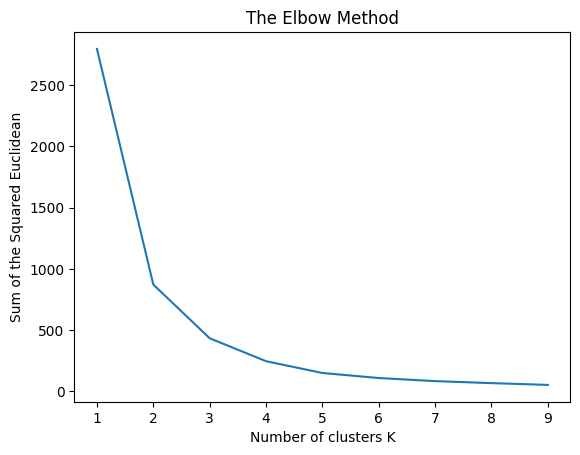

In [24]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [26]:
X = df1.iloc[:,0:1]
y = df1.iloc[:,1:2]

In [28]:
km1 = KMeans(n_clusters=3)
km1.fit(X)
y_cluster = km1.predict(X)
y_cluster

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1,
       1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1,

In [ ]:
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
colours = ['yellow','green','blue']
for idx in range(3):
    plt.scatter(df1[y_cluster == idx]['PetalLengthCm'], df1[y_cluster == idx]['PetalWidthCm'], c = colours[idx], edgecolor='k')
plt.scatter(km1.cluster_centers_[:,2], km1.cluster_centers_[:,3], s = 50, c = 'red', label = 'Centroids', edgecolor='k')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Predicted Clusters with the Cluster Centers')

# actual
# ax2 = fig.add_subplot(122)
# plt.scatter(df1[y == 'Iris-setosa']['PetalLengthCm'], df1[y == 'Iris-setosa']['PetalWidthCm'], c='yellow', label='Setosa', edgecolor='k')
# plt.scatter(df1[y == 'Iris-versicolor']['PetalLengthCm'], df1[y == 'Iris-versicolor']['PetalWidthCm'], c='g', label='Versicolor', edgecolor='k')
# plt.scatter(df1[y == 'Iris-virginica']['PetalLengthCm'], df1[y == 'Iris-virginica']['PetalWidthCm'], c='blue', label='Virginica', edgecolor='k')
# plt.legend()
# plt.xlabel('PetalLengthCm')
# plt.ylabel('PetalWidthCm')
# plt.title('Actual')
plt.show()